In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import os
from pathlib import Path


import numpy as np

if "root" not in locals():
    current_path = Path(os.getcwd())
    root = current_path.parent.absolute()
os.chdir(root)

from src.preprocessing import preprocessVesCoDf, preprocessVintedDf, dropWrongArticles, categoriseMarque
sns.set_style('whitegrid')

import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10,5)})

In [2]:
df_vinted = pd.read_csv('src/data/raw/vintedJean.csv').drop(['Unnamed: 0'], axis=1, inplace=False)
df_vesco = pd.read_csv('src/data/raw/VestCoJean.csv').drop(['Unnamed: 0'], axis=1, inplace=False)

In [3]:
df_vesco

,État,Designer,Taille,En ligne depuis le,nom,prix
0,Très bon état,Levi's,32 US,2022-04-01,Jean's Levi's 510 32x32Traduire,25 €
1,Très bon état,Amiri,32 US,2022-04-04,Jean Amiri Bleu Taille 32 (look usé)Traduire,240 €\n+15 € Contrôle et authentification
2,Très bon état,Amiri,32 US,2022-04-04,Jeans amiri bleu taille 32 look kariertTraduire,240 €\n+15 € Contrôle et authentification
3,Très bon état,Amiri,32 US,2022-04-04,Jean Amiri Bleu Taille 32 (look usé)Traduire,240 €\n+15 € Contrôle et authentification
4,Très bon état,Amiri,32 US,2022-04-04,Jean AMIRI noir à rayures blanches Taille 32Tr...,300 €\n+15 € Contrôle et authentification
...,...,...,...,...,...,...
96,Très bon état,JACOB COHEN,32 US,2022-03-30,Jean Jacob Cohen pour homme tg. 32 en tissu d'...,60 €\n+15 € Contrôle et authentification
97,Jamais porté,Dsquared2,46 FR,2022-03-29,Ces jeans DSQUARED super rares proviennent de ...,"77,88 €"
98,Très bon état,GUESS,28 US,2022-04-02,Jean stretch taille basseTraduire,21 €\n+15 € Contrôle et authentification
99,Très bon état,Gucci,29 US,2022-03-30,Jean déchiré Gucci taille 29 (environ 42) tail...,86 €


In [4]:
df_vesco = preprocessVesCoDf(df_vesco)
df_vinted = preprocessVintedDf(df_vinted)

In [5]:
df_vinted = dropWrongArticles(['jean', 'Jean'], ['Description', 'nom'], df_vinted)
df_vesco = dropWrongArticles(['jean', 'Jean'], ['Description'], df_vesco)

/Users/g0bel1n/scrapped/src/preprocessing.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.keep>0].drop(['keep'], axis=1, inplace=True)
/Users/g0bel1n/scrapped/src/preprocessing.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.keep>0].drop(['keep'], axis=1, inplace=True)


In [6]:
df = pd.concat([df_vinted , df_vesco])

In [7]:
df_vesco

,État,Marque,Date,Description,Prix,keep
0,TRÈS BON ÉTAT,LEVI'S,2022-04-01,JEAN'S LEVI'S 510 32X32TRADUIRE,25.00,False
1,TRÈS BON ÉTAT,AMIRI,2022-04-04,JEAN AMIRI BLEU TAILLE 32 (LOOK USÉ)TRADUIRE,240.00,False
2,TRÈS BON ÉTAT,AMIRI,2022-04-04,JEANS AMIRI BLEU TAILLE 32 LOOK KARIERTTRADUIRE,240.00,False
3,TRÈS BON ÉTAT,AMIRI,2022-04-04,JEAN AMIRI BLEU TAILLE 32 (LOOK USÉ)TRADUIRE,240.00,False
4,TRÈS BON ÉTAT,AMIRI,2022-04-04,JEAN AMIRI NOIR À RAYURES BLANCHES TAILLE 32TR...,300.00,False
...,...,...,...,...,...,...
96,TRÈS BON ÉTAT,JACOB COHEN,2022-03-30,JEAN JACOB COHEN POUR HOMME TG. 32 EN TISSU D'...,60.00,False
97,NEUF SANS ÉTIQUETTE,DSQUARED2,2022-03-29,CES JEANS DSQUARED SUPER RARES PROVIENNENT DE ...,77.88,False
98,TRÈS BON ÉTAT,GUESS,2022-04-02,JEAN STRETCH TAILLE BASSETRADUIRE,21.00,False
99,TRÈS BON ÉTAT,GUCCI,2022-03-30,JEAN DÉCHIRÉ GUCCI TAILLE 29 (ENVIRON 42) TAIL...,86.00,False


In [15]:
df.sort_values(by= 'Prix', ascending=False).Marque.unique()

array(['BURBERRY', 'FEAR OF GOD ESSENTIALS', 'Y/PROJECT', 'AMIRI', 'R13',
       'LOEWE', 'BALMAIN', 'TRUE RELIGION', 'DOLCE & GABBANA',
       'DSQUARED2', 'JUNYA WATANABE', 'DIOR HOMME', 'JACQUEMUS',
       'ISABEL MARANT', 'PHILIPP PLEIN', 'GUCCI', 'JACOB COHEN',
       'SIMON MILLER', 'AGOLDE', 'ISABEL MARANT ETOILE', 'ACNE STUDIOS',
       'TOTÊME', 'VERSACE', 'VICTORIA BECKHAM', 'SANDRO', "LEVI'S",
       'ÉTUDES STUDIO', 'CURRENT ELLIOTT', 'JADED LONDON',
       'YVES SAINT LAURENT', 'STAUD', 'LACOSTE', 'PRADA',
       'STELLA MCCARTNEY', '& OTHER STORIES', 'ELISABETTA FRANCHI',
       'DIESEL', 'JUST CAVALLI', 'FIORUCCI', 'PEPE JEANS', 'SALSA',
       'FREEMAN T. PORTER', 'D&G', 'LEE', 'ZEHOOD', 'MISE AU GREEN',
       'MET', 'NON SIGNÉ / UNSIGNED', 'ZARA', 'FRACOMINA', 'BERSHKA',
       '7 FOR ALL MANKIND', 'LA PETITE FRANCAISE', 'LIU.JO', 'SUPERDRY',
       'MANGO', 'KAPORAL', 'GUESS', 'MORGAN', 'PATRIZIA PEPE', 'H&M',
       'nan', 'MIH JEANS', 'PRETTYLITTLETHING', 'PLEASE',

In [16]:
df.Marque.str.upper()

0      MONDAY DENIM
1             SALSA
2             MANGO
3            LEVI'S
4              ZARA
           ...     
96      JACOB COHEN
97        DSQUARED2
98            GUESS
99            GUCCI
100     PULL & BEAR
Name: Marque, Length: 202, dtype: object

In [17]:
df.Marque = df.Marque.apply(lambda x: str(x)[:-1] if str(x)[-1]==' ' else str(x))

<AxesSubplot:>

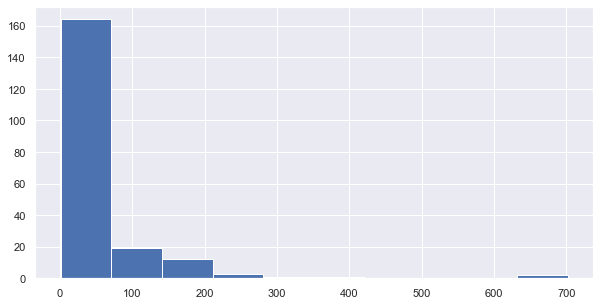

In [27]:
df.Prix.hist()

In [28]:
df['cat'] = df.apply(categoriseMarque, axis=1)

In [29]:
df[df.cat != 'Undefined'].count()

État           186
Marque         186
Date           186
nom            101
Prix           186
Description    186
keep           186
cat            186
dtype: int64

In [30]:
df.Prix.quantile(1/3)

17.86999999999999

In [31]:
df.Prix.quantile(2/3)

39.99999999999997

In [32]:
df.Prix.quantile(0.9)

117.70000000000002

In [33]:
df.to_csv('src/data/treated/jeans.csv')

In [34]:
l ={'1':1, '2':2, 'Test': 'etst'}

In [35]:
b

NameError: name 'b' is not defined

In [11]:
a

'1'